# Lending-Club Dataset

## Dataset overview 

In [1]:
import pandas as pd

In [2]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [3]:
data_info.style.set_properties(subset=['Description'], **{'width': '700px'})

,Description
LoanStatNew,
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when applying for the loan.*
emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"


In [4]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [5]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [6]:
feat_info('mort_acc')

Number of mortgage accounts.


## Load the dataset 

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# might be needed depending on your version of Jupyter
%matplotlib inline

In [8]:
df = pd.read_csv('lending_club_loan_two.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

## Exploratory Data Analysis 

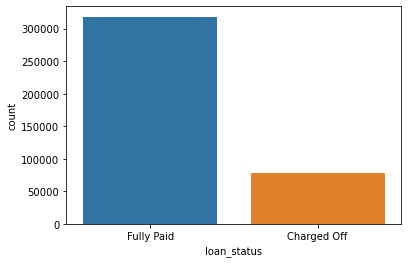

In [10]:
sns.countplot(x='loan_status',data=df);

A count plot showing the loan status

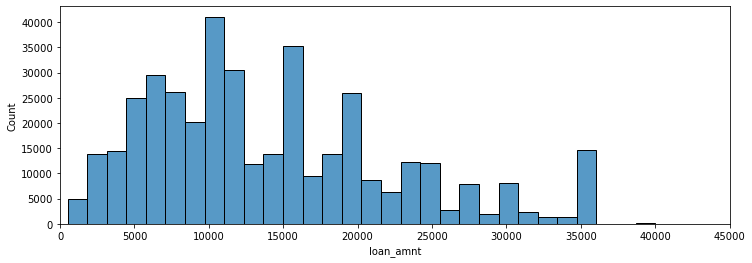

In [11]:
plt.figure(figsize=(12,4))
plt.xlim(0,45000)
sns.histplot(x='loan_amnt',data=df,kde=False,bins=30);

A histogram of the loan_amnt

In [12]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


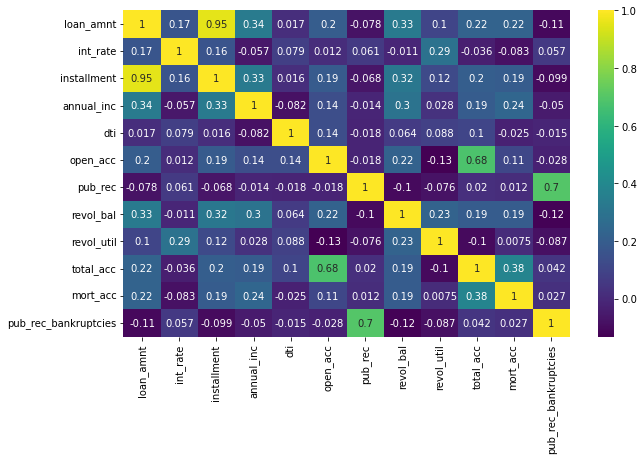

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='viridis');

A heatmap of correlation between features

There is almost a perfect correlation with the "installment" feature. Explore this feature further. Print out their descriptions and perform a scatterplot between them.

In [14]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [15]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


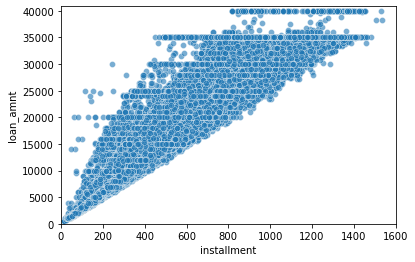

In [16]:
plt.xlim(0,1600)
plt.ylim(0,40850)
sns.scatterplot(x='installment',y='loan_amnt',data=df,alpha=0.6);

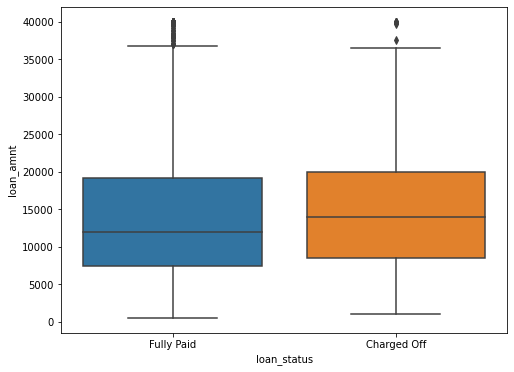

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x='loan_status',y='loan_amnt',data=df);

A boxplot shwowing the relationship between loan_status and loan_amnt

In [18]:
feat_info('loan_status')

Current status of the loan


In [19]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


Summary statistics for the loan amount, grouped by the loan_status

Grade and SubGrade columns

In [20]:
print(sorted(df['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


In [21]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

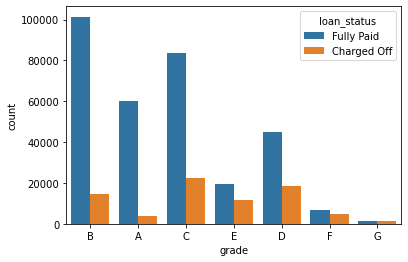

In [22]:
sns.countplot(x='grade',hue='loan_status',data=df);

A countplot as per grade

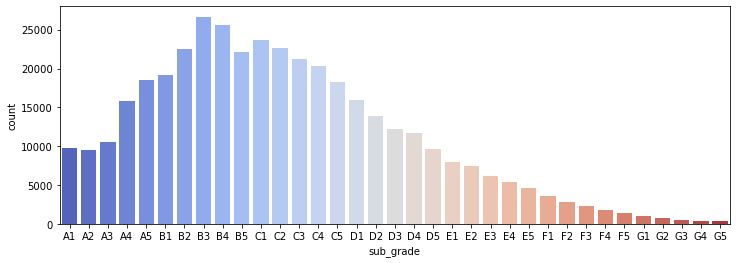

In [23]:
plt.figure(figsize=(12,4))
subgrade_order=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm');

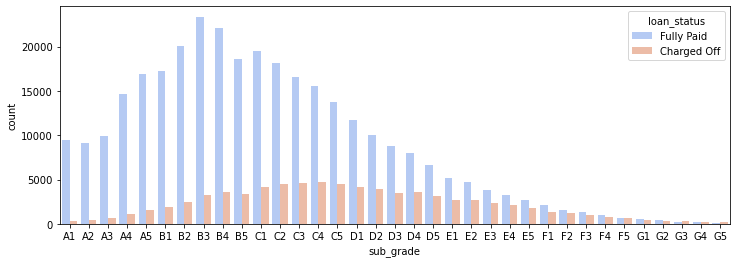

In [24]:
plt.figure(figsize=(12,4))
subgrade_order=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order=subgrade_order,palette='coolwarm',hue='loan_status');

A count plot as per subgrade

It looks like F and G subgrades don't get paid back that often. Isloating those and recreating the countplot just for those subgrades.

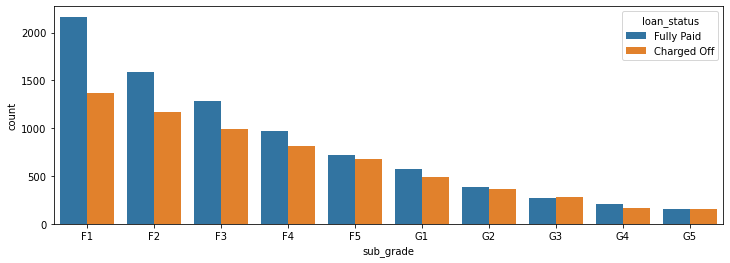

In [25]:
fandg= df[(df['grade']=='G')|(df['grade']=='F')]
sorted_fg=sorted(fandg['sub_grade'].unique())
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade',hue='loan_status',data=fandg,order=sorted_fg);

Creating a new column called 'loan_repaid' which will contain a 1 for "Fully Paid" and a 0 for "Charged Off".

In [26]:
df['loan_repaid']=df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [27]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


<AxesSubplot:>

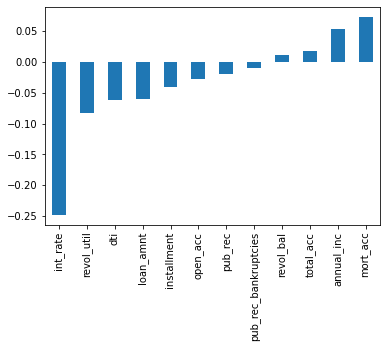

In [28]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

A bar plot showing the correlation of the numeric features to the new loan_repaid column

## Data Preprocessing 

In [29]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",0


In [30]:
len(df)

396030

Exploring the missing data

In [31]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [32]:
100* ((df.isnull().sum()) / len(df))

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

Percentage of missing data

In [33]:
print(feat_info('emp_title'))

print(feat_info('emp_length'))

The job title supplied by the Borrower when applying for the loan.*
None
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
None


In [34]:
len(df['emp_title'].unique())

173106

Unique employee job titles

In [35]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.

In [36]:
df=df.drop('emp_title',axis=1)

In [37]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [38]:
emp_order=sorted(df['emp_length'].dropna().unique())
emp_ord=['< 1 year','1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years','10+ years']

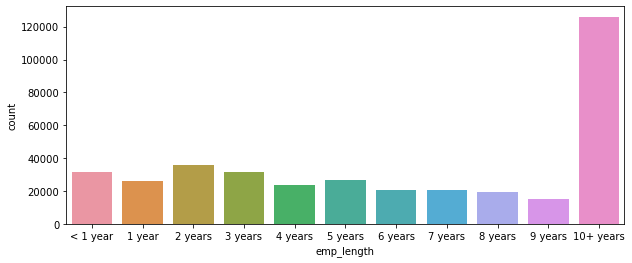

In [39]:
plt.figure(figsize=(10,4))
sns.countplot(x='emp_length',data=df,order=emp_ord);

A count plot of the emp_length feature column

In [40]:
emp_order=sorted(df['emp_length'].dropna().unique())
emp_ord=['< 1 year','1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years','10+ years']

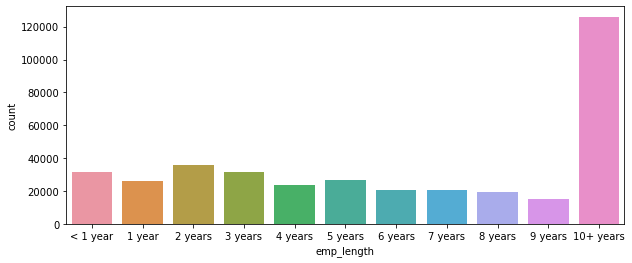

In [41]:
plt.figure(figsize=(10,4))
sns.countplot(x='emp_length',data=df,order=emp_ord);

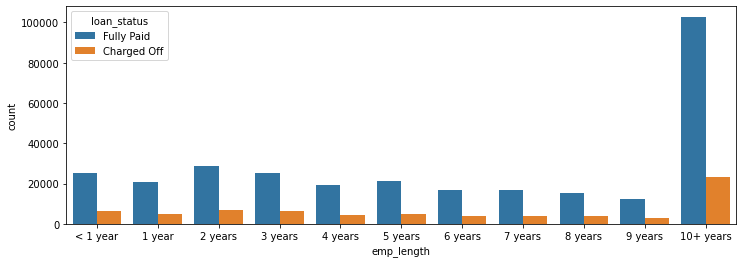

In [42]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_ord,hue='loan_status');

In [43]:
emp_co=df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
emp_fp=df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
emp_len=emp_co/emp_fp
emp_len

emp_length
1 year       0.248649
10+ years    0.225770
2 years      0.239560
3 years      0.242593
4 years      0.238213
5 years      0.237911
6 years      0.233341
7 years      0.241887
8 years      0.249625
9 years      0.250735
< 1 year     0.260830
Name: loan_status, dtype: float64

The percentage of charge offs per category

<AxesSubplot:xlabel='emp_length'>

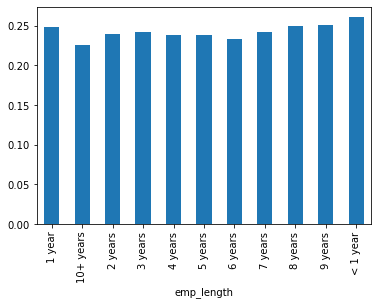

In [44]:
emp_len.plot(kind='bar')

Charge off rates are extremely similar across all employment lengths. Hence drop 'emp_length'

In [45]:
df=df.drop('emp_length',axis=1)

Revisit the DataFrame 

In [46]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

 Review the title column vs the purpose column

In [47]:
df[['purpose','title']].head(10)

,purpose,title
0,vacation,Vacation
1,debt_consolidation,Debt consolidation
2,credit_card,Credit card refinancing
3,credit_card,Credit card refinancing
4,credit_card,Credit Card Refinance
5,debt_consolidation,Debt consolidation
6,home_improvement,Home improvement
7,credit_card,No More Credit Cards
8,debt_consolidation,Debt consolidation
9,debt_consolidation,Debt Consolidation


Looks almost similar

In [48]:
df=df.drop('title',axis=1)

 mort_acc feature

In [49]:
feat_info('mort_acc')

Number of mortgage accounts.


In [50]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

In [51]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

Since the total_acc feature correlates with the mort_acc. Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. 

In [52]:
print("Mean of mort_acc column per total_acc")
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [53]:
total_acc_avg=df.groupby('total_acc').mean()['mort_acc']

In [54]:
total_acc_avg[2.0]

0.0

In [55]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [56]:
df['mort_acc']=df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [57]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. So we will remove the rows that are missing those values in those columns with dropna().

In [58]:
df=df.dropna()
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Creating categorical and dummy variables

In [59]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [60]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [61]:
#Converting 'term' to integer value
df['term']=df['term'].apply(lambda x: int(x[:3]))

In [62]:
df['term'].value_counts()

36    301247
60     93972
Name: term, dtype: int64

We shall drop grade since its classified in subgrade

In [63]:
df=df.drop('grade',axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'dti', 'earliest_cr_line', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'loan_repaid'],
      dtype='object')

In [64]:
#Converting subgrade into dummy variables
subgrade_dummies=pd.get_dummies(df['sub_grade'],drop_first=True)
df=pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

In [65]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [66]:
#Converting columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables
dummies=pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)
df=df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1)
df=pd.concat([df,dummies],axis=1)

In [67]:
#'Home_ownership' feature
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [68]:
#Convert these to dummy variables
df['home_ownership']=df['home_ownership'].replace(['NONE','ANY'],'OTHER')
dummies=pd.get_dummies(df['home_ownership'],drop_first=True)
df=df.drop('home_ownership',axis=1)
df=pd.concat([df,dummies],axis=1)

In [69]:
#Creating a column called 'zip_code' that extracts the zip code from the address column
df['zip_code']=df['address'].apply(lambda x:x[-5:])
#Convert these to dummy variables
dummies=pd.get_dummies(df['zip_code'],drop_first=True)
df=df.drop(['address','zip_code'],axis=1)
df=pd.concat([df,dummies],axis=1)

In [70]:
#drop 'issue_d'
df=df.drop('issue_d',axis=1)

In [71]:
#Extract year from 'earliest_cr_line'
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df=df.drop('earliest_cr_line',axis=1)
df.select_dtypes(['object']).columns

Index(['loan_status'], dtype='object')

## Train Test Split 

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
df=df.drop('loan_status',axis=1)

In [74]:
#Set X & Y variables
X=df.drop('loan_repaid',axis=1).values
y=df['loan_repaid'].values

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [76]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Model

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [78]:
model = Sequential()

model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))

Epoch 1/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2995 - val_loss: 0.2654
Epoch 2/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2653 - val_loss: 0.2632
Epoch 3/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2629 - val_loss: 0.2631
Epoch 4/25
1236/1236 [==============================] - 2s 1ms/step - loss: 0.2619 - val_loss: 0.2623
Epoch 5/25
 892/1236 [====================>.........] - ETA: 0s - loss: 0.2607

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save('myfirstannmodel.h5')

## Evaluate model performance

In [ ]:
losses=pd.DataFrame(model.history.history)
losses.plot()
plt.xlim(0,25)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict(X_test).astype("int32") 
print(classification_report(y_test,predictions))

In [ ]:
confusion_matrix(y_test,predictions)